In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

df = pd.read_csv('Dataframes/AccPerturbationPoliastro.csv')

df

,x,y,z
0,859.072560,-4137.203680,5295.568710
1,1671.259605,-3873.060522,5302.409084
2,2457.156021,-3547.364854,5225.088409
3,3204.297556,-3165.293608,5064.846666
4,3900.846439,-2732.918802,4824.244829
...,...,...,...
495,-14.307306,-5929.450522,7094.101043
496,693.780313,-5775.598733,7191.587070
497,1397.777036,-5585.631049,7244.201205
498,2093.296930,-5360.766353,7251.658017


In [2]:
#Create a new dataframe with only the x column
data = df.filter(['y']) # CHANGE FOR Y,Z

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

400

In [3]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.66843490e-01],
       [1.88552346e-01],
       [2.15319954e-01],
       [2.46720841e-01],
       [2.82255975e-01],
       [3.21360819e-01],
       [3.63414511e-01],
       [4.07749980e-01],
       [4.53664855e-01],
       [5.00432961e-01],
       [5.47316188e-01],
       [5.93576536e-01],
       [6.38488101e-01],
       [6.81348787e-01],
       [7.21491534e-01],
       [7.58294860e-01],
       [7.91192541e-01],
       [8.19682261e-01],
       [8.43333093e-01],
       [8.61791723e-01],
       [8.74787302e-01],
       [8.82134913e-01],
       [8.83737599e-01],
       [8.79586975e-01],
       [8.69762448e-01],
       [8.54429094e-01],
       [8.33834277e-01],
       [8.08303082e-01],
       [7.78232677e-01],
       [7.44085716e-01],
       [7.06382900e-01],
       [6.65694827e-01],
       [6.22633253e-01],
       [5.77841908e-01],
       [5.31986981e-01],
       [4.85747411e-01],
       [4.39805110e-01],
       [3.94835240e-01],
       [3.51496655e-01],
       [3.10422639e-01],


In [4]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.16684349, 0.18855235, 0.21531995, 0.24672084, 0.28225597,
       0.32136082, 0.36341451, 0.40774998, 0.45366486, 0.50043296,
       0.54731619, 0.59357654, 0.6384881 , 0.68134879, 0.72149153,
       0.75829486, 0.79119254, 0.81968226, 0.84333309, 0.86179172,
       0.8747873 , 0.88213491, 0.8837376 , 0.87958698, 0.86976245,
       0.85442909, 0.83383428, 0.80830308, 0.77823268, 0.74408572,
       0.7063829 , 0.66569483, 0.62263325, 0.57784191, 0.53198698,
       0.48574741, 0.43980511, 0.39483524, 0.35149666, 0.31042264,
       0.27221203, 0.23742088, 0.20655465, 0.18006119, 0.15832449,
       0.14165925, 0.13030646, 0.12443001, 0.1241143 , 0.12936308,
       0.14009931, 0.15616631, 0.17732998, 0.20328221, 0.23364539,
       0.26797799, 0.30578105, 0.34650567, 0.38956113, 0.43432374])]
[0.4801462055453744]

[array([0.16684349, 0.18855235, 0.21531995, 0.24672084, 0.28225597,
       0.32136082, 0.36341451, 0.40774998, 0.45366486, 0.50043296,
       0.54731619, 0.59357654, 0.638

In [5]:
x_train.shape

(340, 60, 1)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
22/22 [==============================] - 1s 39ms/step - loss: 0.0633
Epoch 2/20
22/22 [==============================] - 1s 37ms/step - loss: 0.0034
Epoch 3/20
22/22 [==============================] - 1s 39ms/step - loss: 5.9883e-04
Epoch 4/20
22/22 [==============================] - 1s 38ms/step - loss: 4.2856e-04
Epoch 5/20
22/22 [==============================] - 1s 35ms/step - loss: 4.2863e-04
Epoch 6/20
22/22 [==============================] - 1s 36ms/step - loss: 3.9155e-04
Epoch 7/20
22/22 [==============================] - 1s 41ms/step - loss: 3.1847e-04
Epoch 8/20
22/22 [==============================] - 2s 102ms/step - loss: 2.9418e-04
Epoch 9/20
22/22 [==============================] - 2s 104ms/step - loss: 2.8863e-04
Epoch 10/20
22/22 [==============================] - 2s 99ms/step - loss: 2.9932e-04
Epoch 11/20
22/22 [==============================] - 2s 91ms/step - loss: 2.8376e-04
Epoch 12/20
22/22 [==============================] - 2s 80ms/step - loss: 3.1544

In [11]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

349.82574775279096

C:\Users\Vlad\anaconda3\envs\poliastro\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


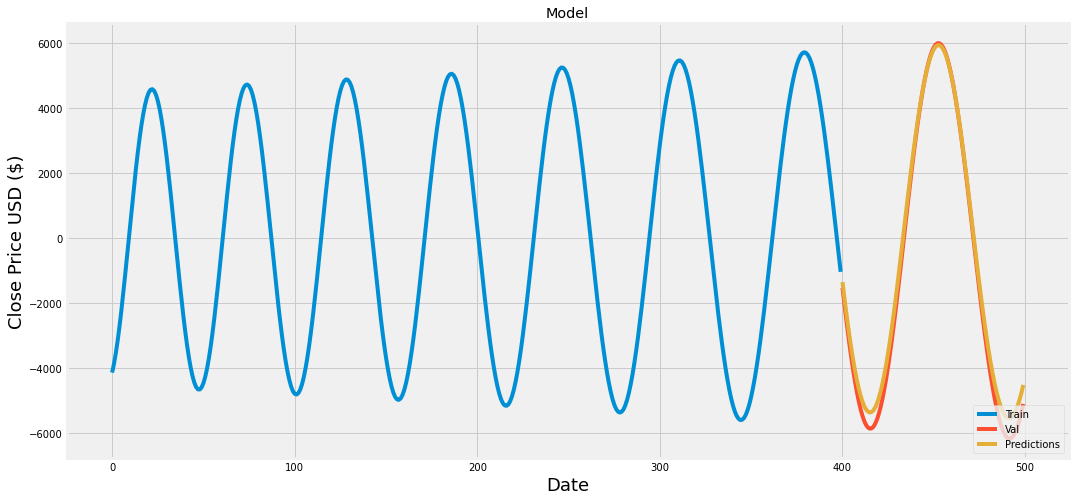

In [12]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Errors:

In [13]:
valid['Error']=abs(valid.Predictions-valid.y)/6738 # the normalization ct is taken as ISS semi-major axis

C:\Users\Vlad\anaconda3\envs\poliastro\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

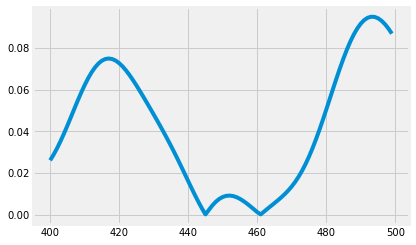

In [14]:
valid.Error.plot()